# Data Mining

## Final Project

# Transfer Learning - ResNet50 

### (TensorFlow + Keras)

### Submitted By - Parth Sharma (UCID - 31543562) 

#### Mail - ps75@njit.edu

### GitHub Link - https://github.com/parth426/Data-Mining/tree/main/Final%20Project

### About this Project -

#### Here I have made use of Transfer Learning Method to use pre-trained ResNet50 CNN as my model for Multi-Class Classification.


## Part - 1

##### (Building CNN Model using TRANSFER LEARNING method) 

##### Importing Libraries & other modules

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [3]:
import keras

In [4]:
print(keras.__version__)

2.4.3


In [5]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
# from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import load_model,Model

##### ImageDataGenerator helps us to perform Data Augmentation

In [6]:
from IPython import get_ipython

In [7]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
# %matplotlib inline

##### glob (short for global) is used to return all file paths that match a specific pattern

##### Fix image size

In [8]:
img_size = [224,224]

#### Decide Train Path & Test Path

In [9]:
train_path = 'Datasets/Train'

In [10]:
test_path = 'Datasets/Test'

### Building CNN model

In [11]:
resnet = ResNet50(input_shape=img_size+[3],weights='imagenet',include_top=False)

In [12]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [13]:
# For not training the existing weights
for layer in resnet.layers:
    layer.trainable = False

###### glob is useful to get O/P classes

In [14]:
folders = glob('Datasets\\Train\\*')

In [15]:
folders

['Datasets\\Train\\audi',
 'Datasets\\Train\\lamborghini',
 'Datasets\\Train\\mercedes']

In [16]:
len(folders)

3

In [17]:
x = Flatten()(resnet.output)

In [18]:
prediction = Dense(len(folders),activation='softmax')(x)

In [19]:
model = Model(inputs = resnet.input, outputs=prediction)

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [23]:
train_data = train_datagen.flow_from_directory('Datasets/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                              )

Found 64 images belonging to 3 classes.


In [24]:
test_data = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 59 images belonging to 3 classes.


#### Fit the model

In [25]:
r = model.fit_generator(train_data,
                       validation_data=test_data,
                       epochs=50,
                       steps_per_epoch = len(train_data),
                       validation_steps=len(test_data))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 5s 2s/step - loss: 3.6913 - accuracy: 0.4062 - val_loss: 4.8697 - val_accuracy: 0.5085
Epoch 2/50
2/2 [==============================] - 4s 2s/step - loss: 8.7853 - accuracy: 0.3438 - val_loss: 4.7506 - val_accuracy: 0.3220
Epoch 3/50
2/2 [==============================] - 4s 2s/step - loss: 4.3800 - accuracy: 0.3125 - val_loss: 4.6418 - val_accuracy: 0.1695
Epoch 4/50
2/2 [==============================] - 4s 2s/step - loss: 4.2591 - accuracy: 0.2969 - val_loss: 3.9928 - val_accuracy: 0.5085
Epoch 5/50
2/2 [==============================] - 4s 2s/step - loss: 2.7371 - accuracy: 0.4844 - val_loss: 1.8109 - val_accuracy: 0.2203
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 1.8715 - accuracy: 0.4688 - val_loss: 4.1066 - val_accuracy: 0.3220
Epoch 7/50
2/2 [==============================] - 4s 2s/step - loss: 2.3578 - accuracy: 0.4688 - val_l

### Plot Loss

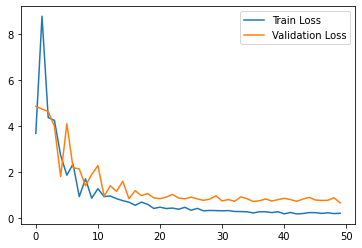

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

### Plot Accuracy

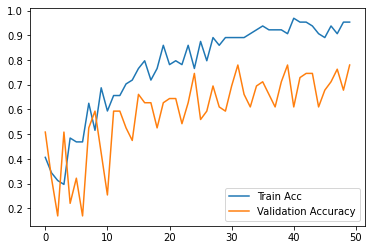

In [27]:
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

## Saving the model

In [28]:
from keras.models import load_model

#### Save the model

In [29]:
model.save('resnet50_car.h5')

#### Make Predictions using saved model

In [30]:
y_pred = model.predict(test_data)

In [31]:
y_pred

array([[2.38734260e-02, 8.98539543e-01, 7.75870681e-02],
       [1.62084866e-03, 9.93303239e-01, 5.07589011e-03],
       [1.89177727e-03, 3.73944677e-02, 9.60713804e-01],
       [2.57445853e-02, 2.60095417e-01, 7.14159966e-01],
       [1.85642224e-02, 7.81721950e-01, 1.99713945e-01],
       [1.10856607e-03, 9.95410621e-01, 3.48084932e-03],
       [1.85142420e-02, 6.56165838e-01, 3.25319946e-01],
       [3.59551400e-01, 3.97454090e-02, 6.00703120e-01],
       [4.11018550e-01, 1.28598344e-02, 5.76121569e-01],
       [8.04796442e-02, 6.57400608e-01, 2.62119740e-01],
       [6.53265864e-02, 6.72876418e-01, 2.61796921e-01],
       [5.01069427e-01, 4.30547059e-01, 6.83834925e-02],
       [5.61556756e-01, 2.93807209e-01, 1.44636005e-01],
       [8.85245085e-01, 7.27891773e-02, 4.19657677e-02],
       [1.15725794e-03, 8.41580033e-01, 1.57262713e-01],
       [5.68083003e-02, 8.00118744e-01, 1.43072948e-01],
       [6.05463564e-01, 1.94975123e-01, 1.99561313e-01],
       [6.54331744e-02, 2.44752

In [32]:
y_pred = np.argmax(y_pred,axis=1)

In [33]:
y_pred

array([1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2], dtype=int64)

#### Load the saved model

In [34]:
model = load_model('resnet50_car.h5')

#### Load a new image 

In [35]:
img = image.load_img('Datasets/Test/audi/22.jpg',target_size=(224,224))

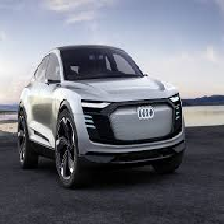

In [36]:
img

In [37]:
x = image.img_to_array(img)

In [38]:
x

array([[[160., 170., 197.],
        [160., 170., 197.],
        [159., 169., 196.],
        ...,
        [158., 164., 190.],
        [158., 162., 187.],
        [156., 160., 185.]],

       [[159., 169., 196.],
        [159., 169., 196.],
        [158., 168., 195.],
        ...,
        [157., 163., 189.],
        [158., 162., 187.],
        [156., 160., 185.]],

       [[159., 169., 196.],
        [159., 169., 196.],
        [158., 168., 195.],
        ...,
        [157., 163., 189.],
        [158., 162., 187.],
        [156., 160., 185.]],

       ...,

       [[ 53.,  53.,  61.],
        [ 54.,  54.,  62.],
        [ 58.,  58.,  66.],
        ...,
        [ 41.,  41.,  49.],
        [ 44.,  44.,  52.],
        [ 46.,  46.,  54.]],

       [[ 53.,  53.,  61.],
        [ 54.,  54.,  62.],
        [ 58.,  58.,  66.],
        ...,
        [ 41.,  41.,  49.],
        [ 44.,  44.,  52.],
        [ 46.,  46.,  54.]],

       [[ 54.,  54.,  62.],
        [ 56.,  56.,  64.],
        [ 59.,  

In [39]:
x = x/255
x

array([[[0.627451  , 0.6666667 , 0.77254903],
        [0.627451  , 0.6666667 , 0.77254903],
        [0.62352943, 0.6627451 , 0.76862746],
        ...,
        [0.61960787, 0.6431373 , 0.74509805],
        [0.61960787, 0.63529414, 0.73333335],
        [0.6117647 , 0.627451  , 0.7254902 ]],

       [[0.62352943, 0.6627451 , 0.76862746],
        [0.62352943, 0.6627451 , 0.76862746],
        [0.61960787, 0.65882355, 0.7647059 ],
        ...,
        [0.6156863 , 0.6392157 , 0.7411765 ],
        [0.61960787, 0.63529414, 0.73333335],
        [0.6117647 , 0.627451  , 0.7254902 ]],

       [[0.62352943, 0.6627451 , 0.76862746],
        [0.62352943, 0.6627451 , 0.76862746],
        [0.61960787, 0.65882355, 0.7647059 ],
        ...,
        [0.6156863 , 0.6392157 , 0.7411765 ],
        [0.61960787, 0.63529414, 0.73333335],
        [0.6117647 , 0.627451  , 0.7254902 ]],

       ...,

       [[0.20784314, 0.20784314, 0.23921569],
        [0.21176471, 0.21176471, 0.24313726],
        [0.22745098, 0

In [40]:
x.shape

(224, 224, 3)

In [41]:
x = np.expand_dims(x,axis=0)

In [42]:
x.shape

(1, 224, 224, 3)

In [43]:
from keras.applications.resnet50 import preprocess_input

In [44]:
img_data = preprocess_input(x)

In [45]:
img_data

array([[[[-103.16645 , -116.112335, -123.05255 ],
         [-103.16645 , -116.112335, -123.05255 ],
         [-103.17037 , -116.11626 , -123.05647 ],
         ...,
         [-103.19391 , -116.135864, -123.060394],
         [-103.20567 , -116.14371 , -123.060394],
         [-103.21352 , -116.15155 , -123.06824 ]],

        [[-103.17037 , -116.11626 , -123.05647 ],
         [-103.17037 , -116.11626 , -123.05647 ],
         [-103.17429 , -116.12018 , -123.060394],
         ...,
         [-103.19783 , -116.139786, -123.064316],
         [-103.20567 , -116.14371 , -123.060394],
         [-103.21352 , -116.15155 , -123.06824 ]],

        [[-103.17037 , -116.11626 , -123.05647 ],
         [-103.17037 , -116.11626 , -123.05647 ],
         [-103.17429 , -116.12018 , -123.060394],
         ...,
         [-103.19783 , -116.139786, -123.064316],
         [-103.20567 , -116.14371 , -123.060394],
         [-103.21352 , -116.15155 , -123.06824 ]],

        ...,

        [[-103.69979 , -116.57116 , -1

In [46]:
img_data.shape

(1, 224, 224, 3)

In [47]:
model.predict(img_data)

array([[0.00459535, 0.0135097 , 0.9818949 ]], dtype=float32)

In [48]:
a = np.argmax(model.predict(img_data),axis=1)

### Prediction of Model on a new image 

In [49]:
print('Predicted car-brand class as per model: ',a)

Predicted car-brand class as per model:  [2]
